**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Split folders with train and validation ratio**

In [ ]:
"""!pip install split_folders
import splitfolders
DIRECTORY= r"/content/drive/MyDrive/Thesis Data set/Dhan-Shomadhan/Field Background"
output="/content/drive/MyDrive/Thesis Data set/prodata"
splitfolders.ratio(DIRECTORY,output,seed=42, ratio=(.8,.2))"""

**Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix

**Print list them**

In [ ]:

print(os.listdir("/content/drive/MyDrive/Dhan-Somadhan/Dhan-Shomadhan/processeddata/"))

FileNotFoundError: ignored

**`Read the data,resize the image, store the label and images to a list `**

In [ ]:
SIZE=128
train_images=[]
train_labels=[]
train_label=[]
for directory_path in glob.glob("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/*"): # used to return all file paths that match a specific pattern
  #print(directory_path)
  label=directory_path.split('/') # seperate the file names neglecting '/'
  label=label[-1] # take the last column name as label
  train_label.append(label)
  print(label)

  for img_path in glob.glob(os.path.join(directory_path,"*.jpg")): # join the files with the images
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)  # read each image 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(SIZE,SIZE)) # resize each image
    train_images.append(img)  #append each image to a list
    train_labels.append(label) # append each label name to a list

 #train_images=np.array(train_images)
 #train_labels=np.array(train_labels)
    


Shath Blight
Leaf Scaled
Rice Blast
Brown Spot
Rice Tungro


**convert to numpy**

In [ ]:



train_images=np.array(train_images)
train_label=np.array(train_labels)
train_images.shape
print(train_images.shape)
#train_labels=['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight']

#print(train_labels[0])

(614, 128, 128)


**Read the data,resize the image, store the label and images to a list**

In [ ]:
SIZE=128
test_images=[]
test_labels=[]
test_label=[]
for directory_path in glob.glob("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/*"):
  label=directory_path.split("/")[-1]
  test_label.append(label)
  #print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images.append(img)
    test_labels.append(label)


**convert them to numpy**

In [ ]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)
print(test_images.shape)

print(test_labels.shape)




(155, 128, 128)
(155,)


**Plot the orignal and resized image**

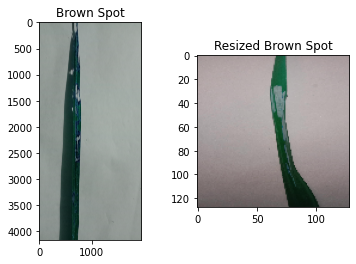

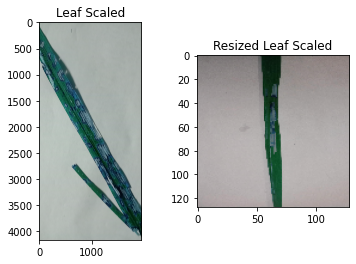

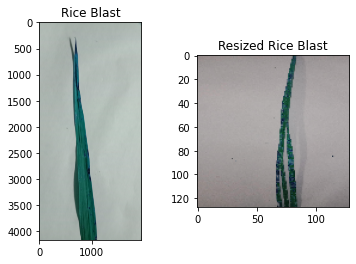

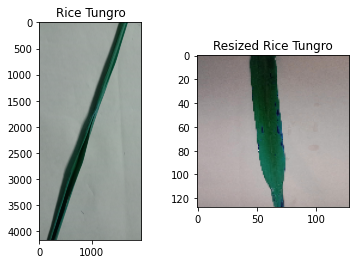

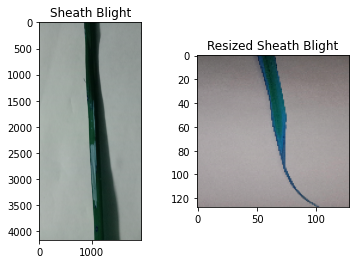

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Brown Spot/bs_wb_0.jpg",cv2.IMREAD_COLOR)
img2=cv2.imread("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Leaf Scaled/ls_wb_1.jpg",cv2.IMREAD_COLOR)
img3=cv2.imread("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Rice Blast/rb_wb_0.jpg",cv2.IMREAD_COLOR)
img4=cv2.imread("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Rice Tungro/rt_wb_0.jpg",cv2.IMREAD_COLOR)
img5=cv2.imread("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Shath Blight/sb_wb_0.jpg",cv2.IMREAD_COLOR)

#plt.imshow(img1)
#plt.subplot()
#plt.imshow(train_images[0])

# subplot is used to plot two images side by side
fig = plt.figure()
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(train_images[0])

ax1.title.set_text('Brown Spot')
ax2.title.set_text('Resized Brown Spot')

#fig.set_figheight(7)
#fig.set_figwidth(7)

ax3 = fig1.add_subplot(1,2,1)
ax3.imshow(img2)
ax4 = fig1.add_subplot(1,2,2)
ax4.imshow(train_images[89])

ax3.title.set_text('Leaf Scaled')
ax4.title.set_text('Resized Leaf Scaled')

ax5 = fig2.add_subplot(1,2,1)
ax5.imshow(img3)
ax6 = fig2.add_subplot(1,2,2)
ax6.imshow(train_images[231])

ax5.title.set_text('Rice Blast')
ax6.title.set_text('Resized Rice Blast')

ax7 = fig3.add_subplot(1,2,1)
ax7.imshow(img4)
ax8 = fig3.add_subplot(1,2,2)
ax8.imshow(train_images[428])

ax7.title.set_text('Rice Tungro')
ax8.title.set_text('Resized Rice Tungro')

ax9 = fig4.add_subplot(1,2,1)
ax9.imshow(img5)
ax10 = fig4.add_subplot(1,2,2)
ax10.imshow(train_images[547])

ax9.title.set_text('Sheath Blight')
ax10.title.set_text('Resized Sheath Blight')



**For plotting purpose seperate each class and label of data in different class**

In [ ]:
train_images1=[]
train_labels1=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Brown Spot","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images1.append(img)
    train_labels1.append(label)





train_images2=[]
train_labels2=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Leaf Scaled","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images2.append(img)
    train_labels2.append(label)



train_images3=[]
train_labels3=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Rice Blast","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images3.append(img)
    train_labels3.append(label)



train_images4=[]
train_labels4=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Rice Tungro","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images4.append(img)
    train_labels4.append(label)




train_images5=[]
train_labels5=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/train/Shath Blight","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images5.append(img)
    train_labels5.append(label)            

**Plot a bar chart for no of data and labels**

<BarContainer object of 5 artists>

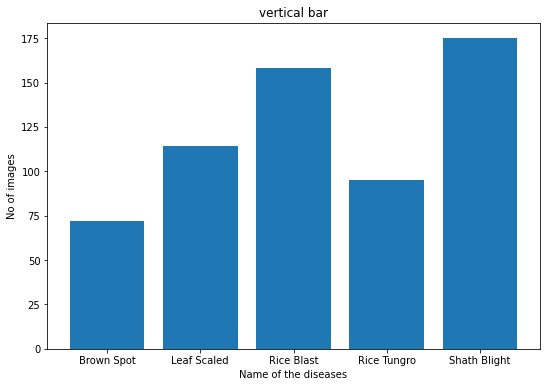

In [ ]:
#print(len(train_images1))
#print(len(train_images2))
#print(len(train_images3))
#print(len(train_images4))
#print(len(train_images5))
#print(train_labels)

yAxis=[]
yAxis.append(len(train_images1))
yAxis.append(len(train_images2))
yAxis.append(len(train_images3))
yAxis.append(len(train_images4))
yAxis.append(len(train_images5))


#Initialize the plot and sublots
# Initialize the plot
fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(131)
ax1.set(title='vertical bar', xlabel='Name of the diseases', ylabel='No of images')
#ax1.bar(train_labels, yAxis)

train_label=['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight']
ax1.bar(train_label, yAxis)

#print(yAxis)
#print(train_labels)


In [ ]:
test_images1=[]
test_labels1=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/Brown Spot","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images1.append(img)
    test_labels1.append(label)





test_images2=[]
test_labels2=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/Leaf Scaled","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images2.append(img)
    test_labels2.append(label)



test_images3=[]
test_labels3=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/Rice Blast","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images3.append(img)
    test_labels3.append(label)



test_images4=[]
test_labels4=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/Rice Tungro","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images4.append(img)
    test_labels4.append(label)




test_images5=[]
test_labels5=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Dhan-somadhan/Dhan-Shomadhan/processeddata/val/Shath Blight","*.jpg")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images5.append(img)
    test_labels5.append(label)            

18
29
40
24
44


<BarContainer object of 5 artists>

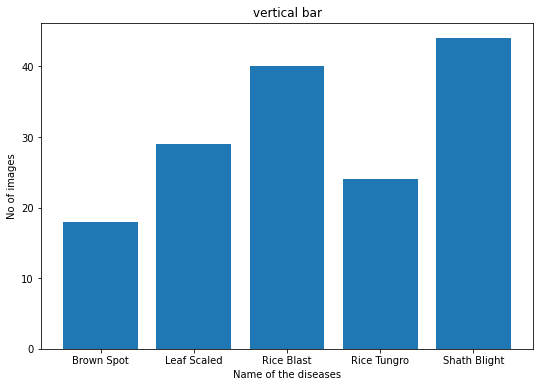

In [ ]:
print(len(test_images1))
print(len(test_images2))
print(len(test_images3))
print(len(test_images4))
print(len(test_images5))



yAxis=[]
yAxis.append(len(test_images1))
yAxis.append(len(test_images2))
yAxis.append(len(test_images3))
yAxis.append(len(test_images4))
yAxis.append(len(test_images5))


#Initialize the plot and sublots
# Initialize the plot
fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(131)
ax1.set(title='vertical bar', xlabel='Name of the diseases', ylabel='No of images')
#ax1.bar(train_labels, yAxis)

test_label=['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight']
ax1.bar(test_label, yAxis)

#print(yAxis)
#print(train_labels)



**Normalize the data**

In [ ]:
#X_train=train_images/255.0
#X_test =test_images/255.0

np.random.shuffle(train_images)
X_train=train_images/255.0
X_test =test_images/255.0



**Encode labels**

In [ ]:

le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_label)
train_labels_encoded=le.transform(train_label)






**Gabor Filter**

In [ ]:
def feature_extractor(dataset):
  x_train=dataset
  image_dataset=pd.DataFrame();
  for image in range(x_train.shape[0]):
      df=pd.DataFrame()
      input_img=x_train[image,:,:]
      img=input_img
      pixel_values=img.reshape(-1)
      df['Pixel_Value']=pixel_values

      num=1
      kernels=[]
      for theta in range(2):

        theta=theta/2. * np.pi
        for sigma in (1,3):
          lamda=np.pi/4
          gamma=0.5
          gabor_label='Gabor' + str(num)
          ksize=23
          
          kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F) 
          kernels.append(kernel)
                #Now filter the image and add values to a new column 
          fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
          filtered_img = fimg.reshape(-1)
          df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
          print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
          num += 1  #I
      edge_sobel = sobel(img)
      edge_sobel1 = edge_sobel.reshape(-1)
      df['Sobel'] = edge_sobel1
       
      image_dataset = image_dataset.append(df)

  return image_dataset        


In [ ]:
#Extract features from training images
image_features = feature_extractor(X_train)

#image_features= image_features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#print(image_features.describe)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [ ]:
#image_features = image_features.fillna(image_features.mean())
print(image_features.describe)

<bound method NDFrame.describe of        Pixel_Value  Gabor1  Gabor2  Gabor3  Gabor4     Sobel
0         0.776471       2       0       2       0  0.004384
1         0.768627       2       0       2       0  0.004902
2         0.772549       2       0       2       0  0.006932
3         0.776471       2       0       2       0  0.004159
4         0.772549       2       0       2       0  0.004902
...            ...     ...     ...     ...     ...       ...
16379     0.572549       2       0       2       0  0.012783
16380     0.572549       2       0       2       0  0.016695
16381     0.556863       2       0       2       0  0.010094
16382     0.576471       2       0       2       0  0.011805
16383     0.572549       2       0       2       0  0.007070

[10059776 rows x 6 columns]>


In [ ]:
#image_features= image_features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)

X_for_RF = np.reshape(image_features, (X_train.shape[0], -1)) 

#print(X_for_RF)


In [ ]:
image_features.shape

(1, 10059776, 6)

In [ ]:
#Define the classifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
RF_model =OneVsRestClassifier( RandomForestClassifier(n_estimators = 50, random_state = 42))
SVM_model = OneVsRestClassifier(svm.SVC(decision_function_shape='ovo'))
dt=OneVsRestClassifier(DecisionTreeClassifier())
knn=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
abc = OneVsRestClassifier(AdaBoostClassifier(n_estimators=50))

#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, train_labels_encoded)

X_for_RF.shape
# Fit the model on training data
RF_model.fit(X_for_RF, train_labels_encoded) #For sklearn no one hot encoding
SVM_model.fit(X_for_RF, train_labels_encoded)
dt.fit(X_for_RF, train_labels_encoded)
knn.fit(X_for_RF, train_labels_encoded)
abc.fit(X_for_RF, train_labels_encoded)


OneVsRestClassifier(estimator=AdaBoostClassifier())

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(X_test)
#test_features = test_features.fillna(image_features.mean())

test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (X_test.shape[0], -1))

print(test_for_RF)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 1.5707963267948966 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 1.5707963267948966 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [ ]:
test_predictionRF = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionRF = le.inverse_transform(test_predictionRF)

test_predictionsvm = SVM_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionsvm = le.inverse_transform(test_predictionsvm)

test_predictionsknn = knn.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionknn = le.inverse_transform(test_predictionsknn)

test_predictiondt = dt.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictiondt = le.inverse_transform(test_predictiondt)

test_predictionada = abc.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionada = le.inverse_transform(test_predictionada)



#Print overall accuracy
from sklearn import metrics
print ("Accuracy for Random Forest = ", metrics.accuracy_score(test_labels, test_predictionRF))
print ("Accuracy for SVM = ", metrics.accuracy_score(test_labels, test_predictionsvm))
print ("Accuracy for decisionTree = ", metrics.accuracy_score(test_labels, test_predictiondt))
print ("Accuracy for Knn = ", metrics.accuracy_score(test_labels, test_predictionknn))
print ("Accuracy for Adaboost = ", metrics.accuracy_score(test_labels, test_predictionada))




Accuracy for Random Forest =  0.21935483870967742
Accuracy for SVM =  0.1870967741935484
Accuracy for decisionTree =  0.25806451612903225
Accuracy for Knn =  0.23870967741935484
Accuracy for Adaboost =  0.2


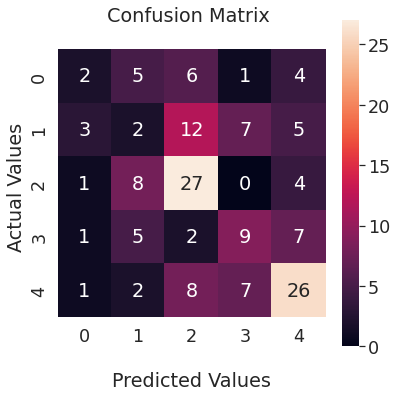

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictionRF)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Check results on a few random images
import random
n=random.randint(0, X_test.shape[0]-1) #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)

In [ ]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_i=RF_model.predict_proba(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Shath Blight']
The actual label for this image is:  Shath Blight


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(test_labels.shape)
print(test_images.shape)
print(img_prediction[:])

(155,)
(155, 128, 128)
['Shath Blight']


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight'], 
                     columns = ['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight'])



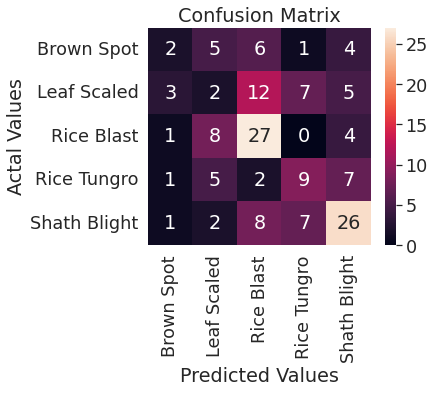

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
print(X_test.shape)
print(test_labels.shape)

(155, 128, 128)
(155,)


In [ ]:
s,nx,ny=X_test.shape
x_test=X_test.reshape((s,nx*ny))
x_test.shape
classes=le.classes_

from sklearn.metrics import roc_curve,auc

(5,)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_for_RF,train_label)
y_pred =RF.predict(test_for_RF)
pred_prob = RF.predict_proba(test_for_RF)

[0.12]


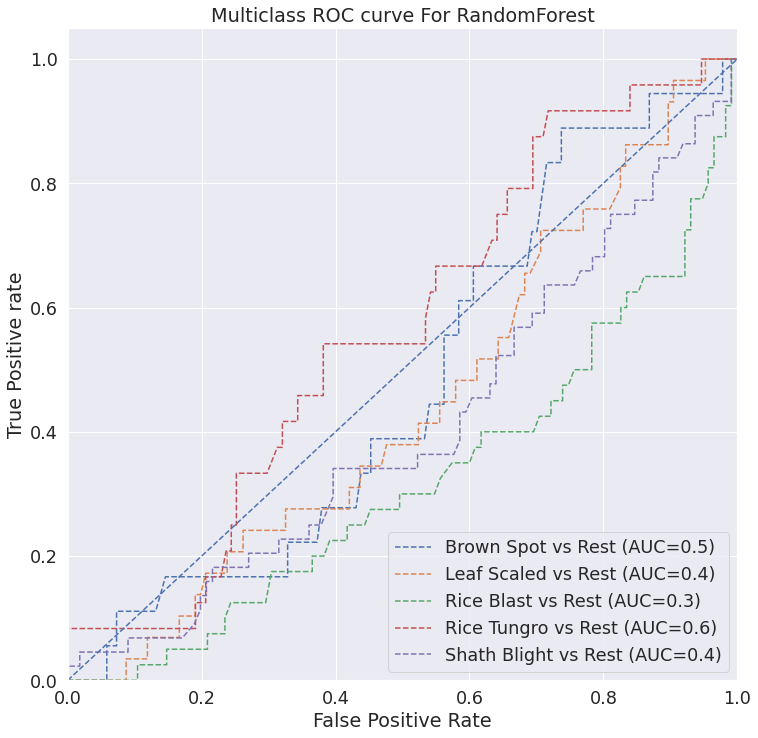

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(test_labels_encoded,classes=np.unique(test_labels_encoded))
print(img_i[:,1])
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.01f)'%(classes[i],roc_auc[i]))

plt.rcParams['figure.figsize']=(12,13)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve For RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.figure(figsize=(10,5))
plt.show()
